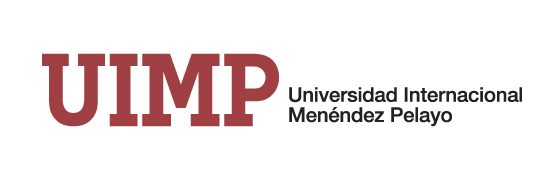

<div class="alert alert-block alert-info"><font size="5"><center><b><u>Adrià Nova Pagés</u></b></center></font>

# <span style=color:darkblue>Machine Learning - CLUSTERING</span>

**REFERENCES**

- https://towardsdatascience.com/clustering-on-numerical-and-categorical-features-6e0ebcf1cbad
- https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/
- https://medium.com/analytics-vidhya/clustering-on-mixed-data-types-in-python-7c22b3898086
- https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb

**SELECCIÓN DE VARIABLES CATEGORICAS Y NUMERICAS**
- https://machinelearningmastery.com/feature-selection-with-categorical-data/ - Categóricas
- https://towardsdatascience.com/feature-selection-techniques-for-classification-and-python-tips-for-their-application-10c0ddd7918b - Numéricas
- https://www.dataknowsall.com/featureselection.html - Mixed dtypes
- https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/ - Mixed dtypes

In [128]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [129]:
pd.set_option('display.max_columns', None)
ahogamientos = pd.read_csv("/Users/adrianova/Desktop/git/TFM - Notebooks/datos_ahogamiento_meteorologicos2.csv",  encoding='utf-8')
ahogamientos.head(2)

,Fecha,IdAhogado,IdPersona,Localidad,Provincia,CCAA,Hora,Latitud,Longitud,Sexo,Edad,Nacionalidad,Origen,Extraccion,Titular,Causa,TipoAhogamiento,Factor,Intervencion,Pronostico,Localizacion,Riesgo,Reanimacion,Vigilancia,Actividad,Deteccion,Enlace1,Indicador,Estacion,Altitud,TempMed,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,TiempoSol,PresionMax,PresionMin
0,30-12-2020,7432,8532,Torredembarra,Tarragona,Cataluña,NaN,41.130523,1.395311,NaN,NaN,España,NaN,Embarcación de rescate,Encuentran un cadáver flotando en el mar cerca...,NaN,Posible Ahogamiento,NaN,Recuperación de cadaver,Ahogamiento mortal,Franja costera o alta mar,NaN,Recuperacion de cadaver,No vigilado,NaN,Ciudadano,#https://www.diarimes.com/es/noticias/camp_tar...,9981A,ESTACIÓN DE TORTOSA (ROQUETES),50,10.0,0.0,8.0,12.1,30.0,4.4,22.8,3.9,1010.0,1000.9
1,29-12-2020,7431,8531,"Cádiz, Playa de Santa Maria del Mar",Cádiz,Andalucía,17:48,36.519991,-6.287258,NaN,NaN,España,NaN,Ciudadano,Evacuada al hospital en estado grave una perso...,NaN,Posible Ahogamiento,NaN,Recuperación de cadaver,Ahogamiento no mortal con hospitalizacion,Playas sin vigilancia,NaN,SVA por SEM,No vigilado,Natación recreativa,Ciudadano,#https://elcorreoweb.es/andalucia/encuentran-u...,5973,CÁDIZ,2,12.2,0.2,9.2,15.3,32.0,3.3,9.4,NaN,1017.0,1011.4


In [130]:
ahogamientos.columns

Index(['Fecha', 'IdAhogado', 'IdPersona', 'Localidad', 'Provincia', 'CCAA',
       'Hora', 'Latitud', 'Longitud', 'Sexo', 'Edad', 'Nacionalidad', 'Origen',
       'Extraccion', 'Titular', 'Causa', 'TipoAhogamiento', 'Factor',
       'Intervencion', 'Pronostico', 'Localizacion', 'Riesgo', 'Reanimacion',
       'Vigilancia', 'Actividad', 'Deteccion', 'Enlace1', 'Indicador',
       'Estacion', 'Altitud', 'TempMed', 'Precip', 'TempMin', 'TempMax',
       'DirViento', 'VelMedViento', 'RachaViento', 'TiempoSol', 'PresionMax',
       'PresionMin'],
      dtype='object')

- Hay algunas variables de las cuáles nos queremos deshacer, ya que no aportan información al modelo:

    - IdAhogado; es un identificador
    - IdPersona; es un identificador
    - Indicador; es un identificador 
    - Localidad; queda explicada por CCAA y con menos categorías
    - Provincia; queda explicada por CCAA y con menos categorías
    - Origen, Causa, Factor, Riesgo; exceso de valores faltantes resultando irrelevante para el modelo*
    - Titular, Enlace1, Estación; no aporta información
    
'*' Todavía no los eliminamos que aplicaremos técnicas de selección de variables
'*' La variable "Hora" la elimino 

In [35]:
# Eliminamos las columnas que estamos 100% seguros que no aportan valor
ahogamientos_df = ahogamientos.copy()
ahogamientos_df.drop(["IdAhogado", "IdPersona", "Hora","Indicador", "Localidad", \
                      "Provincia", "Titular", "Enlace1", "Estacion"], axis = 1, inplace = True)
ahogamientos_df.head(2)

,Fecha,CCAA,Latitud,Longitud,Sexo,Edad,Nacionalidad,Origen,Extraccion,Causa,TipoAhogamiento,Factor,Intervencion,Pronostico,Localizacion,Riesgo,Reanimacion,Vigilancia,Actividad,Deteccion,Altitud,TempMed,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,TiempoSol,PresionMax,PresionMin
0,30-12-2020,Cataluña,41.130523,1.395311,NaN,NaN,España,NaN,Embarcación de rescate,NaN,Posible Ahogamiento,NaN,Recuperación de cadaver,Ahogamiento mortal,Franja costera o alta mar,NaN,Recuperacion de cadaver,No vigilado,NaN,Ciudadano,50,10.0,0.0,8.0,12.1,30.0,4.4,22.8,3.9,1010.0,1000.9
1,29-12-2020,Andalucía,36.519991,-6.287258,NaN,NaN,España,NaN,Ciudadano,NaN,Posible Ahogamiento,NaN,Recuperación de cadaver,Ahogamiento no mortal con hospitalizacion,Playas sin vigilancia,NaN,SVA por SEM,No vigilado,Natación recreativa,Ciudadano,2,12.2,0.2,9.2,15.3,32.0,3.3,9.4,NaN,1017.0,1011.4


+ Miramos el % de valores Nans sobres todo el dataframe para proceder a descartar variables con demasiados valores faltantes

+ Se observa como la variable Riesgo y Factor superan el 50% de valores faltantes, considerandolas demasiado elevadas para tenerlas en cuenta en el modelo

In [36]:
round(ahogamientos_df.isna().sum()/ahogamientos_df.shape[0],4) * 100

Fecha               0.00
CCAA                0.00
Latitud             0.00
Longitud            0.00
Sexo                4.97
Edad               19.70
Nacionalidad        1.16
Origen             43.87
Extraccion          1.32
Causa              28.10
TipoAhogamiento     0.30
Factor             58.22
Intervencion        0.97
Pronostico          0.26
Localizacion        0.00
Riesgo             61.37
Reanimacion         2.83
Vigilancia          0.34
Actividad           4.15
Deteccion           1.71
Altitud             0.00
TempMed             0.42
Precip              4.63
TempMin             0.42
TempMax             0.36
DirViento           2.28
VelMedViento        2.01
RachaViento         2.28
TiempoSol           7.70
PresionMax          0.71
PresionMin          0.70
dtype: float64

In [37]:
# Eliminamos los valores en que la variable Edad tiene Nans por conveniencia

ahogamientos_df = ahogamientos_df.dropna(subset = ["Edad"])

# Eliminamos las variables Factor y Riesgo por almacenar demasiados valores faltantes
# Primera prueba eliminando ORIGEN Y CAUSA
ahogamientos_df.drop(["Origen", "Causa",'Factor', "Riesgo"], axis = 1, inplace = True)

In [38]:
ahogamientos_df.head(5)

,Fecha,CCAA,Latitud,Longitud,Sexo,Edad,Nacionalidad,Extraccion,TipoAhogamiento,Intervencion,Pronostico,Localizacion,Reanimacion,Vigilancia,Actividad,Deteccion,Altitud,TempMed,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,TiempoSol,PresionMax,PresionMin
2,29-12-2020,País Vasco,43.317215,-1.977996,Hombre,47.0,España,Cuerpo de Seguridad o Emergencias,Ahogamiento secundario a accidente,Recuperación de cadaver,Ahogamiento mortal,"Puertos, embarcaderos, amarres",Recuperacion de cadaver,No vigilado,Circulación en vehiculo,"Acompañante, familiar, amigo",251,5.4,36.6,3.8,7.0,26.0,8.9,18.1,0.0,977.5,968.1
3,29-12-2020,País Vasco,43.317215,-1.977996,Hombre,33.0,España,No preciso extraccion,Perdida de Control,Recuperación de cadaver,Rescate y traslado a supervisión médica,"Puertos, embarcaderos, amarres",Sin Reanimacion,No vigilado,Circulación en vehiculo,"Acompañante, familiar, amigo",251,5.4,36.6,3.8,7.0,26.0,8.9,18.1,0.0,977.5,968.1
5,28-12-2020,Canarias,28.485031,-14.094721,Hombre,63.0,Otro,Helicoptero,Ahogamiento secundario a accidente,Rescate por personal adiestrado con equipamiento,Ahogamiento mortal,Playas sin vigilancia,SVA por SEM,No vigilado,Natación recreativa,"Acompañante, familiar, amigo",24,19.6,0.0,15.2,24.0,3.0,3.9,8.9,9.1,1011.0,1008.5
6,28-12-2020,Canarias,28.485031,-14.094721,Hombre,53.0,Otro,Helicoptero,Perdida de Control,Rescate por personal adiestrado con equipamiento,Lesiones,Playas sin vigilancia,Sin Reanimacion,No vigilado,Natación recreativa,"Acompañante, familiar, amigo",24,19.6,0.0,15.2,24.0,3.0,3.9,8.9,9.1,1011.0,1008.5
7,28-12-2020,Canarias,28.396314,-16.651826,Hombre,32.0,Otro,Helicoptero,Ahogamiento secundario a accidente,Rescate por personal adiestrado con equipamiento,Ahogamiento mortal,Playas sin vigilancia,SVA por SEM,No vigilado,Actividad cerca del agua,"Acompañante, familiar, amigo",32,19.2,0.0,17.4,20.9,2.0,1.4,4.7,6.5,NaN,NaN


In [39]:
# Imputación de missings con el valor más frecuente
no_data_columns = ["Sexo", "Nacionalidad", "Extraccion", "TipoAhogamiento", "Intervencion", "Pronostico", "Reanimacion", "Vigilancia", "Actividad", "Deteccion"]
      
for var in no_data_columns:
    moda = ahogamientos_df[var].mode().iloc[0]
    ahogamientos_df[var] = ahogamientos_df[var].fillna(moda)

In [40]:
# Realizamos imputación de missings sobre las variables meteorologicas
median_imputation = ["TempMed", "Precip", "TempMin", "TempMax", "DirViento",\
"VelMedViento", "RachaViento","TiempoSol", "PresionMax", "PresionMin"]

# Calculo de la mediana de cada variable
medians = ahogamientos_df[median_imputation].median()

for median in median_imputation:
    ahogamientos_df[median] = ahogamientos_df[median].fillna(medians[median])

In [41]:
# Creo una variable que asigna valores entre 1 y 5 dependiendo al grupo que pertenece
conditions = [
    (ahogamientos_df['Edad'] > 0) & (ahogamientos_df['Edad'] <= 15),
    (ahogamientos_df['Edad'] >= 16) & (ahogamientos_df['Edad'] <= 30),
    (ahogamientos_df['Edad'] >= 31) & (ahogamientos_df['Edad'] <= 45),
    (ahogamientos_df['Edad'] >= 46) & (ahogamientos_df['Edad'] <= 60),
    (ahogamientos_df['Edad'] >= 61)
]

values = ["adolescentes", "jovenes", "jovenes_adultos", "adultos", "mayores"]

ahogamientos_df['GrupoEdad'] = np.select(conditions, values)

+ Convertimos las variables con su dato correcto

In [42]:
# Variable Fecha
ahogamientos_df["Fecha"] = pd.to_datetime(ahogamientos_df["Fecha"])

# Variable Latitud y Longitud
ahogamientos_df[["Latitud", "Longitud"]] = ahogamientos_df[["Latitud", "Longitud"]].apply(pd.to_numeric, errors = 'coerce')

/var/folders/f4/f_hhbl4s7hb5ldn8l8lf6kzr0000gn/T/ipykernel_75084/834332011.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.


**CATEGORICAL DATA TYPES**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.compose import make_column_selector as selector

In [44]:
# Categorical data
cat_data = ahogamientos_df.select_dtypes(include = ['object'])

In [45]:
X = cat_data.iloc[:, :-1].values
y = cat_data.iloc[:,-1].values

In [46]:
oe = OrdinalEncoder()
oe.fit(X)
X_enc = oe.transform(X)

In [47]:
y = np.reshape(y, (-1, 1))
oe.fit(y)
y_enc = oe.transform(y)

In [48]:
fs = SelectKBest(score_func=chi2, k= 'all')
fs.fit(X_enc, y_enc)
X_train_fs = fs.transform(X_enc)

In [49]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 85.589672
Feature 1: 28.744553
Feature 2: 27.550063
Feature 3: 275.030926
Feature 4: 244.721151
Feature 5: 63.752047
Feature 6: 3035.348964
Feature 7: 195.069313
Feature 8: 1001.211849
Feature 9: 130.307084
Feature 10: 142.451610
Feature 11: 265.970848


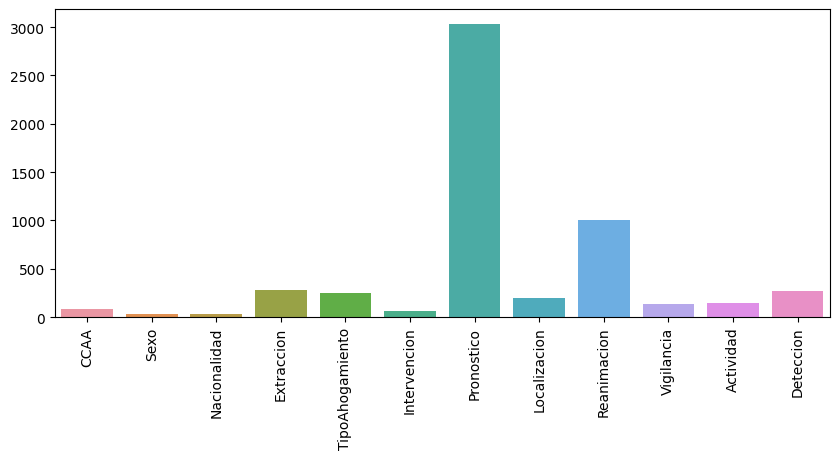

In [50]:
import seaborn as sns
# what are scores for the features
names = []
values = []
for i in range(len(fs.scores_)):
    names.append(cat_data.columns[i])
    values.append(fs.scores_[i])
chi_list = zip(names, values)

# plot the scores
plt.figure(figsize=(10,4))
sns.barplot(x=names, y=values)
plt.xticks(rotation = 90)
plt.show()

In [51]:
fs = SelectKBest(score_func=chi2, k= 5)
fs.fit(X_enc, y_enc)
X_train_fs = fs.transform(X_enc)

In [52]:
fs.get_feature_names_out()

array(['x3', 'x4', 'x6', 'x8', 'x11'], dtype=object)

In [53]:
cat_data = cat_data[["Extraccion", "TipoAhogamiento", "Pronostico", "Reanimacion", "Deteccion"]]
cat_data

,Extraccion,TipoAhogamiento,Pronostico,Reanimacion,Deteccion
2,Cuerpo de Seguridad o Emergencias,Ahogamiento secundario a accidente,Ahogamiento mortal,Recuperacion de cadaver,"Acompañante, familiar, amigo"
3,No preciso extraccion,Perdida de Control,Rescate y traslado a supervisión médica,Sin Reanimacion,"Acompañante, familiar, amigo"
5,Helicoptero,Ahogamiento secundario a accidente,Ahogamiento mortal,SVA por SEM,"Acompañante, familiar, amigo"
6,Helicoptero,Perdida de Control,Lesiones,Sin Reanimacion,"Acompañante, familiar, amigo"
7,Helicoptero,Ahogamiento secundario a accidente,Ahogamiento mortal,SVA por SEM,"Acompañante, familiar, amigo"
...,...,...,...,...,...
8010,Socorrista,Ahogado con sintomas de aspiración de agua,Ahogamiento mortal,RCP basica SOS y SVA por SEM,"Acompañante, familiar, amigo"
8011,Socorrista,Posible Ahogamiento,Ahogamiento mortal,RCP basica SOS y SVA por SEM,Socorrista en servicio
8012,Socorrista,Posible Ahogamiento,Ahogamiento mortal,RCP basica SOS y SVA por SEM,Ciudadano
8013,Socorrista,Ahogado con sintomas de aspiración de agua,Ahogamiento mortal,RCP basica SOS y SVA por SEM,Socorrista en servicio


**Numerical Data Types**

In [54]:
numb_data = ahogamientos_df.select_dtypes(include = ['float64', 'int64'])
numb_data.head()

,Latitud,Longitud,Edad,Altitud,TempMed,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,TiempoSol,PresionMax,PresionMin
2,43.317215,-1.977996,47.0,251,5.4,36.6,3.8,7.0,26.0,8.9,18.1,0.0,977.5,968.1
3,43.317215,-1.977996,33.0,251,5.4,36.6,3.8,7.0,26.0,8.9,18.1,0.0,977.5,968.1
5,28.485031,-14.094721,63.0,24,19.6,0.0,15.2,24.0,3.0,3.9,8.9,9.1,1011.0,1008.5
6,28.485031,-14.094721,53.0,24,19.6,0.0,15.2,24.0,3.0,3.9,8.9,9.1,1011.0,1008.5
7,28.396314,-16.651826,32.0,32,19.2,0.0,17.4,20.9,2.0,1.4,4.7,6.5,1011.8,1008.0


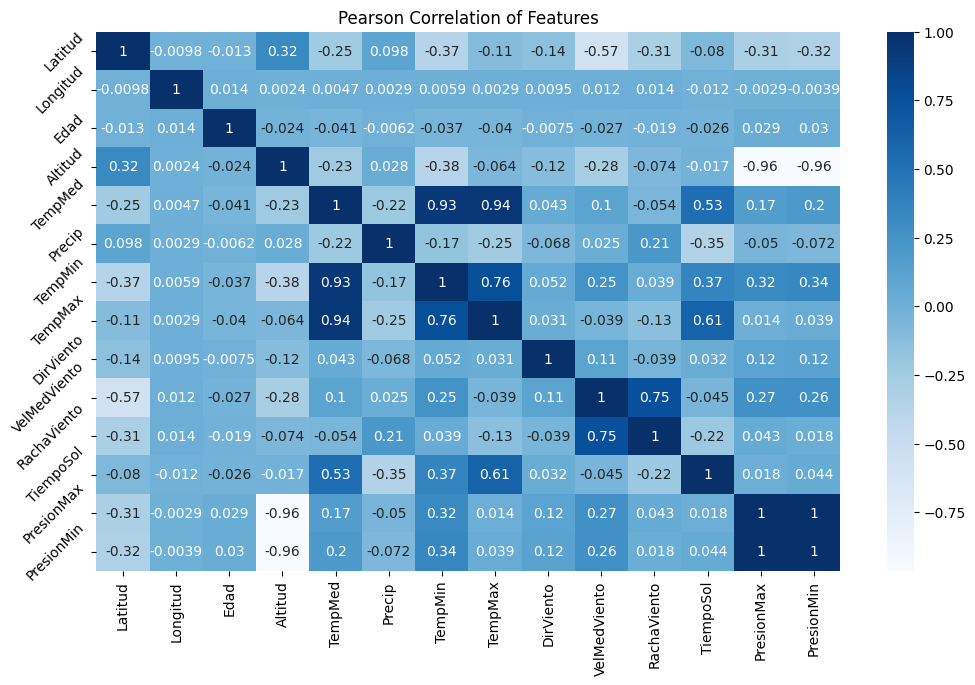

In [55]:
corr = numb_data.corr()

f, ax = plt.subplots(figsize = (12,7))

sns.heatmap(corr, cmap = 'Blues', annot = True, square = False, ax = ax)
plt.title('Pearson Correlation of Features')
plt.yticks(rotation=45);

+ Podemos ver varias características con correlaciones muy altas entre ellas que pueden hacer que nuestro modelo interprete incorrectamente, por lo que debemos seleccionar:

    - La temperatura media tiene correlaciones muy altas con las variables temperatuda mínima y máxima como es de esperar, ya que cuando la temperatura máxima y mínima de un día frío es baja, es de esperar que la temperatura media del día también lo sea y viceversa con las temperaturas para un día caluroso.
    
    - La velocidad media del viento y la racha de viento tienen una correlación del 75%, de modo que solo nos quedaremos con la racha del viento, ya que la variable velocidad media del viento está fuertemente correlacionada con la variable altitud.
    
    - La variable TempSol esta correlacionada con la temperatura media, pero al no ser una relación fuerte la mantendremos en el modelo.
    
    - La altitud esta intrísicamente relacionada con la presión mínima y máxima, ya que a menor altitud mayor presión y viceversa. Por lo que decidimos quedarnos únicamente con la altitud, ya que presion max y min están a su vez relacionadas porque cuando en una sube, la otra baja. 

In [56]:
columns = ["TempMin", "TempMax", "VelMedViento", "PresionMax", "PresionMin"]
numb_data = numb_data.drop(columns, axis = 1)

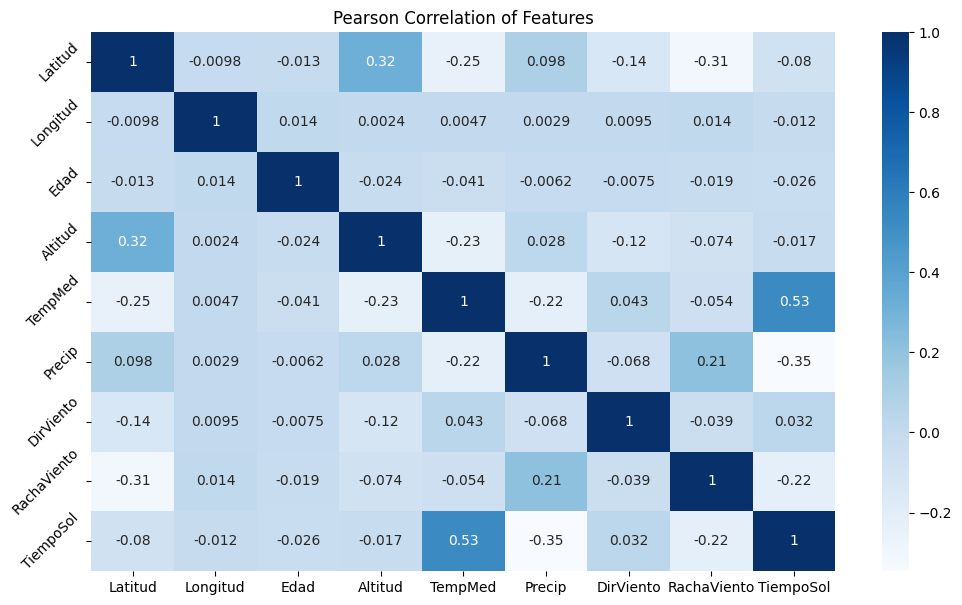

In [57]:
corr = numb_data.corr()

f, ax = plt.subplots(figsize = (12,7))

sns.heatmap(corr, cmap = 'Blues', annot = True, square = False, ax = ax)
plt.title('Pearson Correlation of Features')
plt.yticks(rotation=45);

In [58]:
from sklearn.preprocessing import MinMaxScaler
# Normalizamos los datos meteorologicos
scaler = MinMaxScaler()

# Aplicación de la normalización sonre las variables
numb_data = pd.DataFrame(scaler.fit_transform(numb_data), columns = numb_data.columns)

# Clustering GOWER ALL VARIABLES

In [59]:
ahogamientos_df.head(2)

,Fecha,CCAA,Latitud,Longitud,Sexo,Edad,Nacionalidad,Extraccion,TipoAhogamiento,Intervencion,Pronostico,Localizacion,Reanimacion,Vigilancia,Actividad,Deteccion,Altitud,TempMed,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,TiempoSol,PresionMax,PresionMin,GrupoEdad
2,2020-12-29,País Vasco,43.317215,-1.977996,Hombre,47.0,España,Cuerpo de Seguridad o Emergencias,Ahogamiento secundario a accidente,Recuperación de cadaver,Ahogamiento mortal,"Puertos, embarcaderos, amarres",Recuperacion de cadaver,No vigilado,Circulación en vehiculo,"Acompañante, familiar, amigo",251,5.4,36.6,3.8,7.0,26.0,8.9,18.1,0.0,977.5,968.1,adultos
3,2020-12-29,País Vasco,43.317215,-1.977996,Hombre,33.0,España,No preciso extraccion,Perdida de Control,Recuperación de cadaver,Rescate y traslado a supervisión médica,"Puertos, embarcaderos, amarres",Sin Reanimacion,No vigilado,Circulación en vehiculo,"Acompañante, familiar, amigo",251,5.4,36.6,3.8,7.0,26.0,8.9,18.1,0.0,977.5,968.1,jovenes_adultos


In [60]:
ahogamientos_df.shape

(6436, 28)

In [61]:
# Eliminar 4 valores faltantes
ahogamientos_df.drop(["Latitud", "Longitud"], axis =1, inplace= True)

In [62]:
# Eliminamos columnas que no van a intervenir en nuestro modelo
columns = ["TempMin", "TempMax", "VelMedViento", "PresionMax", "PresionMin"]
numb_data = numb_data.drop(columns, axis = 1)

KeyError: "['TempMin', 'TempMax', 'VelMedViento', 'PresionMax', 'PresionMin'] not found in axis"

In [ ]:
X = ahogamientos_df.iloc[:, :-1]
y = ahogamientos_df.iloc[:, -1]

In [ ]:
# Normalizamos los datos que son numericos
# df_numeric = X.select_dtypes(include = [np.number])

# scaler = MinMaxScaler()

# df_numeric = pd.DataFrame(scaler.fit_transform(df_numeric), columns = df_numeric.columns)

In [ ]:
# Reemplazar las columnas originales con las columnas normalizadas
#X.update(df_numeric)

In [ ]:
X.shape

In [ ]:
import gower

distance_matrix = gower.gower_matrix(X)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan_cluster = DBSCAN(eps = 0.2, min_samples = 2, metric = "precomputed")

dbscan_cluster.fit(distance_matrix)

In [ ]:
X["Cluster"] = dbscan_cluster.labels_

In [ ]:
X["Cluster"].value_counts()

# Clustering GOWER only with the important features

In [ ]:
ahogamientos_df.head(2)

In [ ]:
ahogamientos_df2 = ahogamientos_df[["Extraccion", "TipoAhogamiento", "Pronostico", "Reanimacion", "Deteccion",\
                                            "Altitud", "TempMed", "Precip", "DirViento", "RachaViento", "TiempoSol"]]

ahogamientos_df2.head(3)

In [ ]:
distance_matrix2 = gower.gower_matrix(ahogamientos_df2)

In [ ]:
dbscan_cluster = DBSCAN(eps = 0.2, min_samples = 2, metric = "precomputed")

dbscan_cluster.fit(distance_matrix2)

In [ ]:
ahogamientos_df2["Cluster"] = dbscan_cluster.labels_

In [ ]:
ahogamientos_df2["Cluster"].value_counts()

# Clustering KPROTOTYPES ALL VARIABLES

In [ ]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine

# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes

In [ ]:
ahogamientos_df.drop(["Fecha"], axis = 1, inplace = True)

In [ ]:
df = ahogamientos_df.copy()
df.head(2)

In [ ]:
df.select_dtypes('object').nunique()

In [ ]:
df.describe()

In [ ]:
# Obtener la posicion de las columnas categoricas
cat_cols = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print ( 'Categorical column: {}'.format(list(df.select_dtypes('object').columns))) 
print ( 'Posición de columnas categóricas: {}'.format(cat_cols))
    

In [ ]:
# Convertir dataframe a matriz
dfMatrix = df.to_numpy()
dfMatrix

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = cat_cols)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

In [65]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})
df_cost.head()

,Cluster,Cost
0,1,4.011459e+08
1,2,9.010735e+07
2,3,3.989438e+07
3,4,3.156617e+07
4,5,2.607604e+07


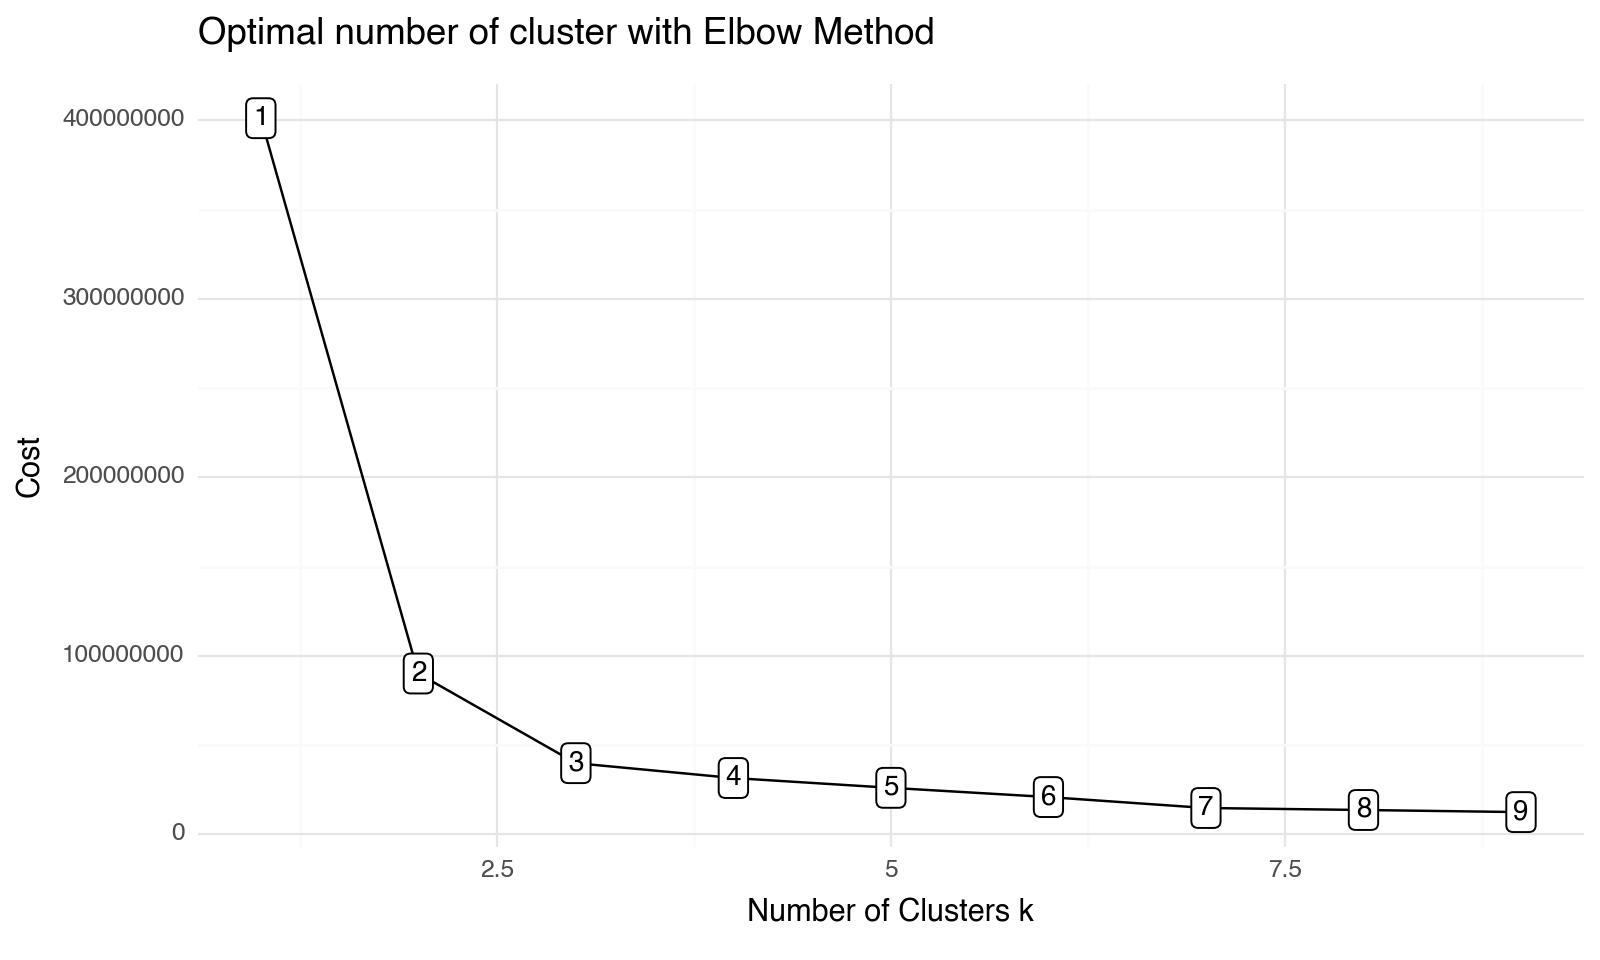

<Figure Size: (800 x 480)>

In [66]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [67]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = cat_cols)

array([0, 0, 1, ..., 1, 1, 1], dtype=uint16)

In [70]:
# Cluster centorid
kprototype.cluster_centroids_
# Check the iteration of the clusters created
kprototype.n_iter_
# Check the cost of the clusters created
kprototype.cost_

39894378.91813779

In [71]:
# Add the cluster to the dataframe
df['Cluster Labels'] = kprototype.labels_
df['Segment'] = df['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})
# Order the cluster
df['Segment'] = df['Segment'].astype('category')
df['Segment'] = df['Segment'].cat.reorder_categories(['First','Second','Third'])

In [89]:
df["Segment"].value_counts()

Second    5125
First      832
Third      479
Name: Segment, dtype: int64

In [72]:
df.head()

,CCAA,Sexo,Edad,Nacionalidad,Extraccion,TipoAhogamiento,Intervencion,Pronostico,Localizacion,Reanimacion,Vigilancia,Actividad,Deteccion,Altitud,TempMed,Precip,TempMin,TempMax,DirViento,VelMedViento,RachaViento,TiempoSol,PresionMax,PresionMin,GrupoEdad,Cluster Labels,Segment
2,País Vasco,Hombre,47.0,España,Cuerpo de Seguridad o Emergencias,Ahogamiento secundario a accidente,Recuperación de cadaver,Ahogamiento mortal,"Puertos, embarcaderos, amarres",Recuperacion de cadaver,No vigilado,Circulación en vehiculo,"Acompañante, familiar, amigo",251,5.4,36.6,3.8,7.0,26.0,8.9,18.1,0.0,977.5,968.1,adultos,0,First
3,País Vasco,Hombre,33.0,España,No preciso extraccion,Perdida de Control,Recuperación de cadaver,Rescate y traslado a supervisión médica,"Puertos, embarcaderos, amarres",Sin Reanimacion,No vigilado,Circulación en vehiculo,"Acompañante, familiar, amigo",251,5.4,36.6,3.8,7.0,26.0,8.9,18.1,0.0,977.5,968.1,jovenes_adultos,0,First
5,Canarias,Hombre,63.0,Otro,Helicoptero,Ahogamiento secundario a accidente,Rescate por personal adiestrado con equipamiento,Ahogamiento mortal,Playas sin vigilancia,SVA por SEM,No vigilado,Natación recreativa,"Acompañante, familiar, amigo",24,19.6,0.0,15.2,24.0,3.0,3.9,8.9,9.1,1011.0,1008.5,mayores,1,Second
6,Canarias,Hombre,53.0,Otro,Helicoptero,Perdida de Control,Rescate por personal adiestrado con equipamiento,Lesiones,Playas sin vigilancia,Sin Reanimacion,No vigilado,Natación recreativa,"Acompañante, familiar, amigo",24,19.6,0.0,15.2,24.0,3.0,3.9,8.9,9.1,1011.0,1008.5,adultos,1,Second
7,Canarias,Hombre,32.0,Otro,Helicoptero,Ahogamiento secundario a accidente,Rescate por personal adiestrado con equipamiento,Ahogamiento mortal,Playas sin vigilancia,SVA por SEM,No vigilado,Actividad cerca del agua,"Acompañante, familiar, amigo",32,19.2,0.0,17.4,20.9,2.0,1.4,4.7,6.5,1011.8,1008.0,jovenes_adultos,1,Second


# Clustering KPROTOTYPES only with the important features

In [116]:
ahogamientos_df2 = ahogamientos_df[["Sexo", "Edad", "Nacionalidad","Extraccion", "TipoAhogamiento", "Pronostico", "Reanimacion", "Deteccion",\
                                            "Altitud", "TempMed", "Precip", "DirViento", "RachaViento", "TiempoSol"]]

df2 = ahogamientos_df2.copy()
df2.head(3)

,Sexo,Edad,Nacionalidad,Extraccion,TipoAhogamiento,Pronostico,Reanimacion,Deteccion,Altitud,TempMed,Precip,DirViento,RachaViento,TiempoSol
2,Hombre,47.0,España,Cuerpo de Seguridad o Emergencias,Ahogamiento secundario a accidente,Ahogamiento mortal,Recuperacion de cadaver,"Acompañante, familiar, amigo",251,5.4,36.6,26.0,18.1,0.0
3,Hombre,33.0,España,No preciso extraccion,Perdida de Control,Rescate y traslado a supervisión médica,Sin Reanimacion,"Acompañante, familiar, amigo",251,5.4,36.6,26.0,18.1,0.0
5,Hombre,63.0,Otro,Helicoptero,Ahogamiento secundario a accidente,Ahogamiento mortal,SVA por SEM,"Acompañante, familiar, amigo",24,19.6,0.0,3.0,8.9,9.1


In [117]:
# Obtener la posicion de las columnas categoricas
cat_cols2 = [df2.columns.get_loc(col) for col in list(df2.select_dtypes('object').columns)]
print ( 'Categorical column: {}'.format(list(df2.select_dtypes('object').columns))) 
print ( 'Posición de columnas categóricas: {}'.format(cat_cols2))

Categorical column: ['Sexo', 'Nacionalidad', 'Extraccion', 'TipoAhogamiento', 'Pronostico', 'Reanimacion', 'Deteccion']
Posición de columnas categóricas: [0, 2, 3, 4, 5, 6, 7]


In [118]:
# Convertir dataframe a matriz
dfMatrix2 = df2.to_numpy()
dfMatrix2

array([['Hombre', 47.0, 'España', ..., 26.0, 18.1, 0.0],
       ['Hombre', 33.0, 'España', ..., 26.0, 18.1, 0.0],
       ['Hombre', 63.0, 'Otro', ..., 3.0, 8.9, 9.1],
       ...,
       ['Hombre', 67.0, 'Otro', ..., 11.0, 12.5, 8.6],
       ['Hombre', 67.0, 'Otro', ..., 30.0, 8.3, 8.2],
       ['Hombre', 44.0, 'Otro', ..., 30.0, 8.3, 8.2]], dtype=object)

In [119]:
# Choose optimal K using Elbow method
cost2 = []
for cluster in range(1, 6):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix2, categorical = cat_cols2)
        cost2.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5


In [120]:
# Converting the results into a dataframe and plotting them
df_cost2 = pd.DataFrame({'Cluster':range(1, 6), 'Cost':cost2})
df_cost2.head()

,Cluster,Cost
0,1,3.906804e+08
1,2,9.168338e+07
2,3,3.781922e+07
3,4,2.973710e+07
4,5,2.578000e+07


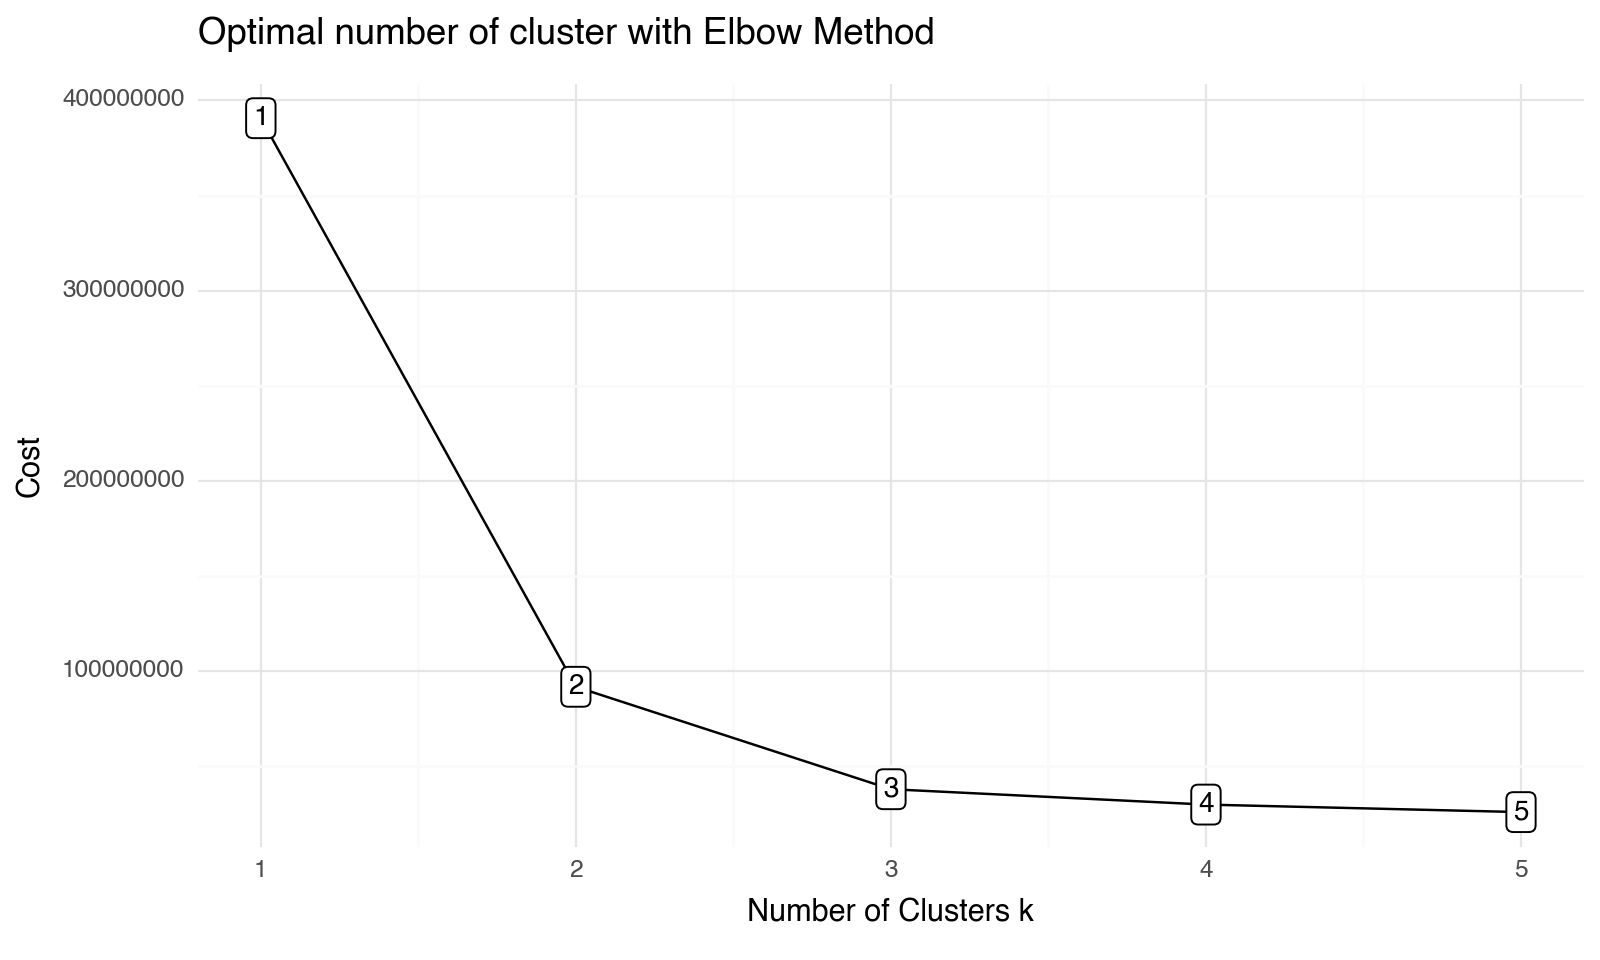

<Figure Size: (800 x 480)>

In [121]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost2)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [122]:
# Fit the cluster
kprototype2 = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kprototype2.fit_predict(dfMatrix2, categorical = cat_cols2)

array([1, 1, 2, ..., 2, 2, 2], dtype=uint16)

In [123]:
# Cluster centorid
kprototype2.cluster_centroids_
# Check the iteration of the clusters created
kprototype2.n_iter_
# Check the cost of the clusters created
kprototype2.cost_

37819220.8573823

In [112]:
df2.drop(['Cluster Labels', 'Segment'], axis = 1, inplace = True)

In [124]:
# Add the cluster to the dataframe
df2['Cluster Labels'] = kprototype2.labels_
df2['Segment'] = df2['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})
# Order the cluster
df2['Segment'] = df2['Segment'].astype('category')
df2['Segment'] = df2['Segment'].cat.reorder_categories(['First','Second','Third'])

In [125]:
df2["Segment"].value_counts()

Third     5125
Second     832
First      479
Name: Segment, dtype: int64

In [126]:
df2.head()

,Sexo,Edad,Nacionalidad,Extraccion,TipoAhogamiento,Pronostico,Reanimacion,Deteccion,Altitud,TempMed,Precip,DirViento,RachaViento,TiempoSol,Cluster Labels,Segment
2,Hombre,47.0,España,Cuerpo de Seguridad o Emergencias,Ahogamiento secundario a accidente,Ahogamiento mortal,Recuperacion de cadaver,"Acompañante, familiar, amigo",251,5.4,36.6,26.0,18.1,0.0,1,Second
3,Hombre,33.0,España,No preciso extraccion,Perdida de Control,Rescate y traslado a supervisión médica,Sin Reanimacion,"Acompañante, familiar, amigo",251,5.4,36.6,26.0,18.1,0.0,1,Second
5,Hombre,63.0,Otro,Helicoptero,Ahogamiento secundario a accidente,Ahogamiento mortal,SVA por SEM,"Acompañante, familiar, amigo",24,19.6,0.0,3.0,8.9,9.1,2,Third
6,Hombre,53.0,Otro,Helicoptero,Perdida de Control,Lesiones,Sin Reanimacion,"Acompañante, familiar, amigo",24,19.6,0.0,3.0,8.9,9.1,2,Third
7,Hombre,32.0,Otro,Helicoptero,Ahogamiento secundario a accidente,Ahogamiento mortal,SVA por SEM,"Acompañante, familiar, amigo",32,19.2,0.0,2.0,4.7,6.5,2,Third


**UNION OF CATEGORICAL AND NUMERIC DATA**

In [ ]:
import pandas as pd

# Creating a dictionary with the data
dictionary = {"age": [22, 25, 30, 38, 42, 47, 55, 62, 61, 90], 
              "gender": ["M", "M", "F", "F", "F", "M", "M", "M", "M", "M"], 
              "civil_status": ["SINGLE", "SINGLE", "SINGLE", "MARRIED", "MARRIED", "SINGLE", "MARRIED", "DIVORCED", "MARRIED", "DIVORCED"], 
              "salary": [18000, 23000, 27000, 32000, 34000, 20000, 40000, 42000, 25000, 70000], 
              "has_children": [False, False, False, True, True, False, False, False, False, True], 
              "purchaser_type": ["LOW_PURCHASER", "LOW_PURCHASER", "LOW_PURCHASER", "HEAVY_PURCHASER", "HEAVY_PURCHASER", "LOW_PURCHASER", "MEDIUM_PURCHASER", "MEDIUM_PURCHASER", "MEDIUM_PURCHASER", "LOW_PURCHASER"]}

# Creating a Pandas DataFrame from the dictionary
dataframe = pd.DataFrame.from_dict(dictionary)

In [ ]:
dataframe

In [ ]:
import gower

distance_matrix = gower.gower_matrix(dataframe)
distance_matrix

In [ ]:
from sklearn.cluster import DBSCAN

# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(eps=0.3, 
                        min_samples=2, 
                        metric="precomputed")

# Fitting the clustering algorithm
dbscan_cluster.fit(distance_matrix)

# Adding the results to a new column in the dataframe
dataframe["cluster"] = dbscan_cluster.labels_

In [ ]:
dataframe

**K-MODES**

In [ ]:
import pandas as pd
import numpy as np

# Create toy dataset
hair_color = np.array(['blonde', 'brunette', 'red', 'black', 'brunette', 'black', 'red', 'black'])
eye_color = np.array(['amber', 'gray', 'green', 'hazel', 'amber', 'gray', 'green', 'hazel'])
skin_color = np.array(['fair', 'brown', 'brown', 'brown', 'fair', 'brown', 'fair', 'fair'])
person = ['P1','P2','P3','P4','P5','P6','P7','P8']
data = pd.DataFrame({'person':person, 'hair_color':hair_color, 'eye_color':eye_color, 'skin_color':skin_color})
data = data.set_index('person')
print(data)

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

In [ ]:
data.insert(0, "Cluster", clusters, True)
data

**FEATURE SELECTION**

In [ ]:
# example of chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
X, y = load_dataset('/Users/adrianova/Desktop/breast_cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
# example of mutual information feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
X, y = load_dataset('/Users/adrianova/Desktop/breast_cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
# Modelo de regresión logística con todas las variables 
# evaluation of a model using all input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# load the dataset
X, y = load_dataset('/Users/adrianova/Desktop/breast_cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# Seleccion de 4 variables más relevantes con chi2
# evaluation of a model fit using chi squared input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=4)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs

# load the dataset
X, y = load_dataset('/Users/adrianova/Desktop/breast_cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# Seleccion de 4 variables más relevantes con evaluación mutua
# evaluation of a model fit using mutual information input features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k=4)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs

# load the dataset
X, y = load_dataset('/Users/adrianova/Desktop/breast_cancer.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

**FEATURE SELECTION 2**

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/adrianova/Desktop/bank.csv", delimiter=";")
df.head()

In [ ]:
df["job"].value_counts()

In [ ]:
X_train_enc

In [ ]:
# get categorical data
cat_data = df.select_dtypes(include=['object'])

In [ ]:
X = cat_data.iloc[:, :-1].values
y = cat_data.iloc[:,-1].values

In [ ]:
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [ ]:
def select_features(X_train, y_train, X_test, k_value='all'):
    fs = SelectKBest(score_func=chi2, k=k_value)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

In [ ]:
names = []
values = []
for i in range(len(fs.scores_)):
    names.append(cat_data.columns[i])
    values.append(fs.scores_[i])
chi_list = zip(names, values)

# plot the scores
plt.figure(figsize=(10,4))
sns.barplot(x=names, y=values)
plt.xticks(rotation = 90)
plt.show()


In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc, 5)

In [ ]:
fs.get_feature_names_out()

In [ ]:
print(X_train_fs.shape)
print(X_test_fs.shape)